This notebook is for general EDA, etc.
 * Build 3-5 visualizations that give a good overview of the documents...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

In [3]:
with open('../data/complete_corpus.txt', 'rb') as file:
    cf_kv = pickle.load(file)

In [4]:
for i in cf_kv.keys():
    print(i)

Address of Tatian to the Greeks
Athenagoras the Athenian
Bible Complete
Clement of Alexandria Exhortation to the Heathen
Clement of Alexandria The Salvation of the Rich Man
Clement of Alexandria Trilogy
Clement of Alexandria, The Stromata
Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew
Epistle of Adrian Antoninus and Marcus Aurelius
Epistle of Clement of Rome
False Ignatius
Fragments of Papias
Fragments of the Lost Work of Justin on the Resurrection
Hippolytus of Rome Expository Treatise Against The Jews
Hippolytus of Rome Treatise On Christ and Antichrist
Igantius Syriac Epistles
Ignatius Other
Ireanaus Against Heresies Book III
Ireanaus Fragments from the Lost Writings
Irenaeus Against Heresies Book I
Irenaeus Against Heresies Book II
Irenaeus Against Heresies Book V
Ireneaus Against Heresies Book IV
Justin's Hortatory Address to the Greeks
New Testament
Old Testament
Origen
Tertullian
The Didache
The Epistle of Barnabas
The Epistle of Ignatius to Polycarp
The Epistle 

In [5]:
cf_kv_wordcount = {}

for k, v in cf_kv.items():
    text=len(v)
    cf_kv_wordcount[k]=text
    

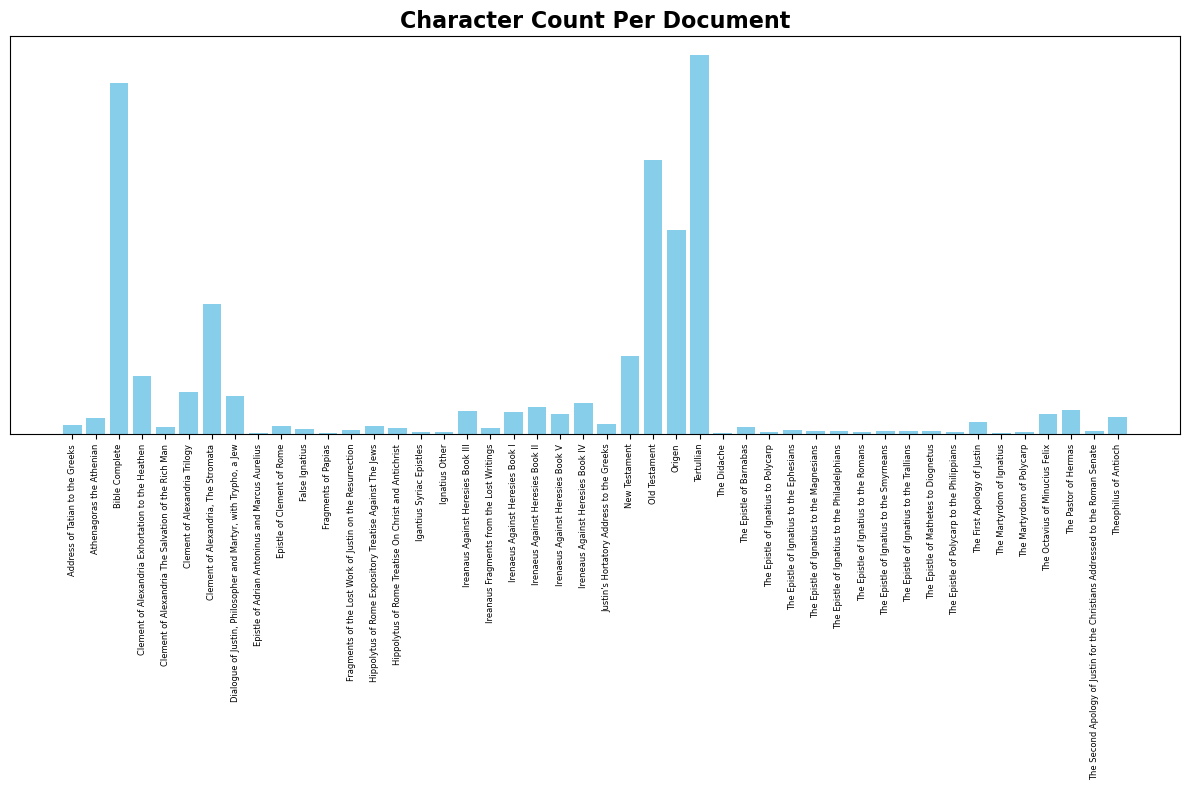

In [6]:
empty=[]
plt.figure(figsize=(12, 8))
plt.bar(range(len(cf_kv_wordcount)), cf_kv_wordcount.values(), color='skyblue')
plt.xticks(ticks=range(len(cf_kv_wordcount)), labels=list(cf_kv_wordcount.keys()), rotation=90, fontsize=6)
plt.yticks(empty)
plt.title('Character Count Per Document', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../pngs/charactercount.png')
plt.show()

In [9]:
writings_dates = {
    "The Didache": "circa 50-70 AD",
    "Epistle of Clement of Rome": "circa 96 AD",
    "The Epistle of Barnabas": "circa 70-130 AD",
    "Fragments of Papias": "circa 130 AD",
    "The Pastor of Hermas": "circa 140 AD",
    "Epistle of Adrian Antoninus and Marcus Aurelius": "circa 138 AD",
    "Ignatius Syriac Epistles": "circa 110 AD",
    "Ignatius Other": "circa 110 AD",
    "The Epistle of Ignatius to Polycarp": "circa 110 AD",
    "The Epistle of Ignatius to the Ephesians": "circa 110 AD",
    "The Epistle of Ignatius to the Magnesians": "circa 110 AD",
    "The Epistle of Ignatius to the Philadelphians": "circa 110 AD",
    "The Epistle of Ignatius to the Romans": "circa 110 AD",
    "The Epistle of Ignatius to the Smyrneans": "circa 110 AD",
    "The Epistle of Ignatius to the Trallians": "circa 110 AD",
    "The Martyrdom of Ignatius": "circa 110 AD",
    "The Epistle of Polycarp to the Philippians": "circa 110-140 AD",
    "Justin's Hortatory Address to the Greeks": "circa 150 AD",
    "Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew": "circa 155 AD",
    "The First Apology of Justin": "circa 155 AD",
    "The Second Apology of Justin for the Christians Addressed to the Roman Senate": "circa 155 AD",
    "The Martyrdom of Polycarp": "circa 155-160 AD",
    "Address of Tatian to the Greeks": "circa 160 AD",
    "Fragments of the Lost Work of Justin on the Resurrection": "circa 165 AD",
    "Athenagoras the Athenian": "circa 177 AD",
    "Irenaeus Against Heresies Book I": "circa 180 AD",
    "Irenaeus Against Heresies Book II": "circa 180 AD",
    "Irenaeus Against Heresies Book III": "circa 180 AD",
    "Irenaeus Against Heresies Book IV": "circa 180 AD",
    "Irenaeus Against Heresies Book V": "circa 180 AD",
    "Theophilus of Antioch": "circa 180 AD",
    "Clement of Alexandria Exhortation to the Heathen": "circa 190 AD",
    "Clement of Alexandria Trilogy": "circa 190 AD",
    "Clement of Alexandria, The Stromata": "circa 198 AD",
    "Clement of Alexandria The Salvation of the Rich Man": "circa 200 AD",
    "Hippolytus of Rome Treatise On Christ and Antichrist": "circa 202 AD",
    "Tertullian": "circa 197-220 AD",
    "False Ignatius": "late 2nd century AD",
    "Irenaeus Fragments from the Lost Writings": "late 2nd century AD",
    "The Epistle of Mathetes to Diognetus": "late 2nd century AD",
    "Hippolytus of Rome Expository Treatise Against The Jews": "early 3rd century AD",
    "Origen": "early 3rd century AD",
    "The Octavius of Minucius Felix": "late 2nd to early 3rd century AD"
}

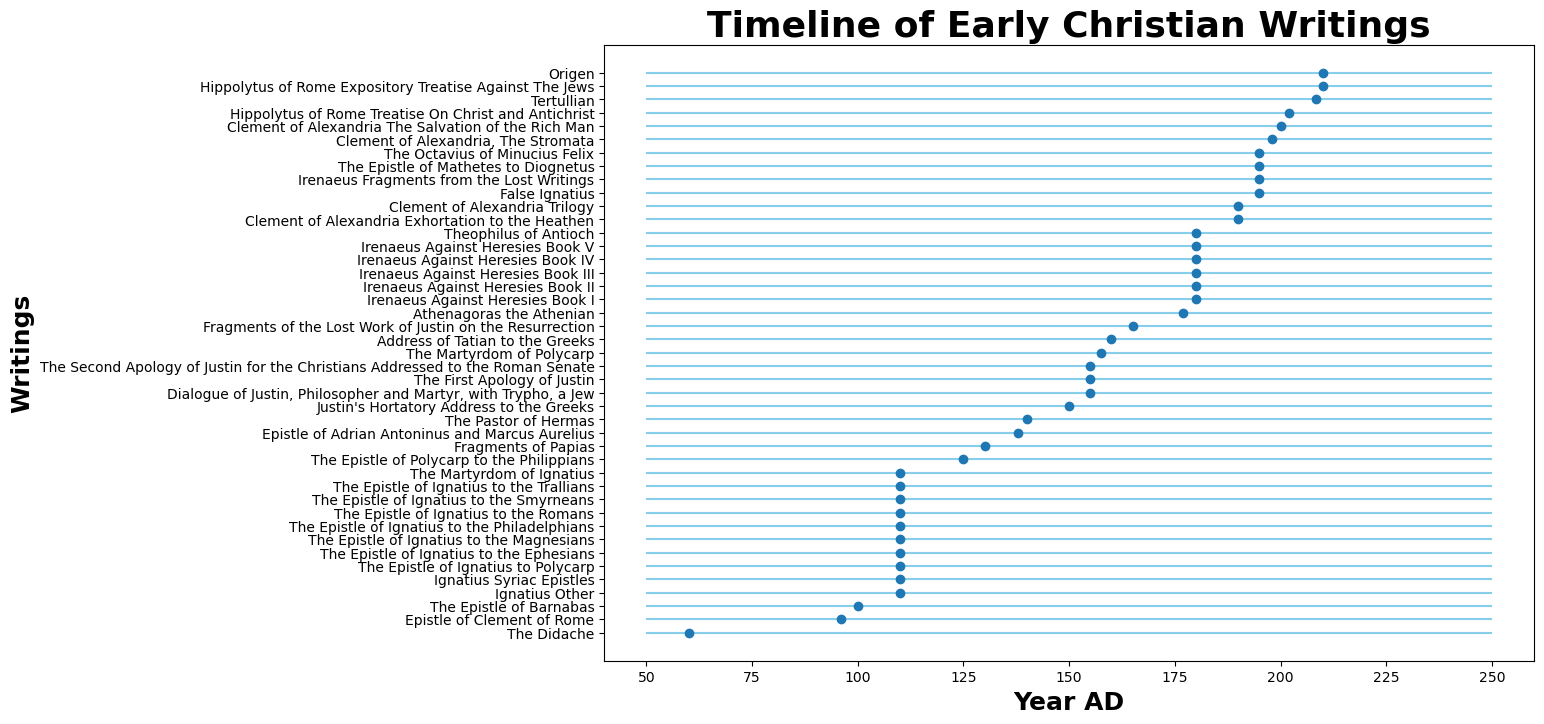

In [13]:
labels = list(writings_dates.keys())
dates = list(writings_dates.values())

# Convert the dates to a suitable numerical format
def convert_date(date_str):
    if "circa" in date_str:
        date_str = date_str.replace("circa", "").strip()
    if "-" in date_str:
        start, end = map(int, date_str.replace(" AD", "").split("-"))
        return (start + end) / 2
    elif "late" in date_str:
        return 195  # Approximate value for late 2nd century AD
    elif "early" in date_str:
        return 210  # Approximate value for early 3rd century AD
    else:
        return int(date_str.replace(" AD", "").strip())

# Convert all dates
numeric_dates = [convert_date(date) for date in dates]

# Sort the data by dates
sorted_data = sorted(zip(numeric_dates, labels))

# Unzip the sorted data
sorted_dates, sorted_labels = zip(*sorted_data)

# Create the plot
plt.figure(figsize=(12, 8))
plt.hlines(y=sorted_labels, xmin=50, xmax=250, color='skyblue')
plt.plot(sorted_dates, sorted_labels, "o")

# Add title and labels
plt.title('Timeline of Early Christian Writings', fontsize=26, fontweight='bold')
plt.xlabel('Year AD', fontsize=18, fontweight='bold')
plt.ylabel('Writings', fontsize=18, fontweight='bold')

# Display the plot
plt.savefig('../pngs/timeline.png', bbox_inches='tight')
plt.show()

The Didache: Unknown authorship, but likely written in Syria.
Latitude: 34.8021° N
Longitude: 38.9968° E
    
Epistle of Clement of Rome: Clement of Rome
Latitude: 41.9028° N
Longitude: 12.4964° E (Rome, Italy)
    
The Epistle of Barnabas: Unknown authorship, possibly Alexandria, Egypt.
Latitude: 31.2001° N
Longitude: 29.9187° E (Alexandria, Egypt)

Fragments of Papias: Papias
Latitude: 38.4237° N
Longitude: 27.1428° E (Hierapolis, Turkey)

The Pastor of Hermas: Hermas
Latitude: 41.9028° N
Longitude: 12.4964° E (Rome, Italy)

Epistle of Adrian Antoninus and Marcus Aurelius: Roman Emperors
Latitude: 41.9028° N
Longitude: 12.4964° E (Rome, Italy)

Ignatius Syriac Epistles: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

Ignatius Other: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Epistle of Ignatius to Polycarp: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Epistle of Ignatius to the Ephesians: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Epistle of Ignatius to the Magnesians: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Epistle of Ignatius to the Philadelphians: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Epistle of Ignatius to the Romans: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Epistle of Ignatius to the Smyrneans: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Epistle of Ignatius to the Trallians: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Martyrdom of Ignatius: Ignatius of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

The Epistle of Polycarp to the Philippians: Polycarp
Latitude: 38.4237° N
Longitude: 27.1428° E (Smyrna, Turkey)

Justin's Hortatory Address to the Greeks: Justin Martyr
Latitude: 32.5061° N
Longitude: 35.2898° E (Flavia Neapolis, modern-day Nablus, Palestine)

Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew: Justin Martyr
Latitude: 32.5061° N
Longitude: 35.2898° E (Flavia Neapolis, modern-day Nablus, Palestine)

The First Apology of Justin: Justin Martyr
Latitude: 32.5061° N
Longitude: 35.2898° E (Flavia Neapolis, modern-day Nablus, Palestine)

The Second Apology of Justin for the Christians Addressed to the Roman Senate: Justin Martyr
Latitude: 32.5061° N
Longitude: 35.2898° E (Flavia Neapolis, modern-day Nablus, Palestine)

The Martyrdom of Polycarp: Unknown authorship, related to Polycarp
Latitude: 38.4237° N
Longitude: 27.1428° E (Smyrna, Turkey)

Address of Tatian to the Greeks: Tatian
Latitude: 36.2021° N
Longitude: 37.1343° E (Assyria, modern-day region in Syria/Iraq)

Fragments of the Lost Work of Justin on the Resurrection: Justin Martyr
Latitude: 32.5061° N
Longitude: 35.2898° E (Flavia Neapolis, modern-day Nablus, Palestine)
    
Athenagoras the Athenian: Athenagoras
Latitude: 37.9838° N
Longitude: 23.7275° E (Athens, Greece)

Irenaeus Against Heresies Book I: Irenaeus
Latitude: 38.3566° N
Longitude: 21.5167° E (Smyrna, Turkey)

Irenaeus Against Heresies Book II: Irenaeus
Latitude: 38.3566° N
Longitude: 21.5167° E (Smyrna, Turkey)

Irenaeus Against Heresies Book III: Irenaeus
Latitude: 38.3566° N
Longitude: 21.5167° E (Smyrna, Turkey)

Irenaeus Against Heresies Book IV: Irenaeus
Latitude: 38.3566° N
Longitude: 21.5167° E (Smyrna, Turkey)

Irenaeus Against Heresies Book V: Irenaeus
Latitude: 38.3566° N
Longitude: 21.5167° E (Smyrna, Turkey)

Theophilus of Antioch: Theophilus of Antioch
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

Clement of Alexandria Exhortation to the Heathen: Clement of Alexandria
Latitude: 31.2001° N
Longitude: 29.9187° E (Alexandria, Egypt)

Clement of Alexandria Trilogy: Clement of Alexandria
Latitude: 31.2001° N
Longitude: 29.9187° E (Alexandria, Egypt)

Clement of Alexandria, The Stromata: Clement of Alexandria
Latitude: 31.2001° N
Longitude: 29.9187° E (Alexandria, Egypt)

Clement of Alexandria The Salvation of the Rich Man: Clement of Alexandria
Latitude: 31.2001° N
Longitude: 29.9187° E (Alexandria, Egypt)

Hippolytus of Rome Treatise On Christ and Antichrist: Hippolytus of Rome
Latitude: 41.9028° N
Longitude: 12.4964° E (Rome, Italy)

Tertullian: Tertullian
Latitude: 36.8065° N
Longitude: 10.1815° E (Carthage, Tunisia)

False Ignatius: Unknown authorship, associated with Ignatius
Latitude: 36.2021° N
Longitude: 37.1343° E (Antioch, Turkey)

Irenaeus Fragments from the Lost Writings: Irenaeus
Latitude: 38.3566° N
Longitude: 21.5167° E (Smyrna, Turkey)

The Epistle of Mathetes to Diognetus: Mathetes (unknown author, possibly from Alexandria)
Latitude: 31.2001° N
Longitude: 29.9187° E (Alexandria, Egypt)

Hippolytus of Rome Expository Treatise Against The Jews: Hippolytus of Rome
Latitude: 41.9028° N
Longitude: 12.4964° E (Rome, Italy)

Origen: Origen
Latitude: 31.2001° N
Longitude: 29.9187° E (Alexandria, Egypt)

The Octavius of Minucius Felix: Minucius Felix
Latitude: 41.9028° N
Longitude: 12.4964° E (Rome, Italy)